# 数据分析

使用天池新人赛的数据做一个数据分析，赛事详情
https://tianchi.aliyun.com/competition/entrance/231702/information
赛题使用公开数据的问卷调查结果，选取其中多组变量，包括个体变量（性别、年龄、地域、职业、健康、婚姻与政治面貌等等）、家庭变量（父母、配偶、子女、家庭资本等等）、社会态度（公平、信用、公共服务等等），来预测其对幸福感的评价。


比较喜欢的数据分析的例子
https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12282042.0.0.3bdc290aps5KBs&postId=4662
https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12282042.0.0.3bdc290aps5KBs&postId=6772

##  1. 数据导入

In [6]:
# 引入需要的包
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sklearn
#from sklearn import preprocessing

In [7]:
# 读取数据
testdata = pd.read_csv('../data/dataannalysis/happiness_test_abbr.csv')
traindata = pd.read_csv('../data/dataannalysis/happiness_train_abbr.csv')

## 2.数据总览

In [3]:
traindata.head()

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,...,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability
0,1,4,1,12,32,59,2015/8/4 14:18,1,1959,1,...,60000.0,2,2,1,2,3,3,2,4,3
1,2,4,2,18,52,85,2015/7/21 15:04,1,1992,1,...,40000.0,3,4,1,2,1,1,1,4,2
2,3,4,2,29,83,126,2015/7/21 13:24,2,1967,1,...,8000.0,3,3,1,2,3,2,1,4,2
3,4,5,2,10,28,51,2015/7/25 17:33,2,1943,1,...,12000.0,3,3,1,1,7,2,1,3,2
4,5,4,1,7,18,36,2015/8/10 9:50,2,1994,1,...,-2.0,4,3,1,1,1,3,2,3,-8


survey_type		样本类型	1 = 城市; 2 = 农村; 

province	采访地点-省/自治区/直辖市编码	1 = 上海市; 2 = 云南省; 3 = 内蒙古自治区; 4 = 北京市; 5 = 吉林省; 6 = 四川省; 7 = 天津市; 8 = 宁夏回族自治区; 9 = 安徽省; 10 = 山东省; 11 = 山西省; 12 = 广东省; 13 = 广西壮族自治区; 14 = 新疆维吾尔自治区; 15 = 江苏省; 16 = 江西省; 17 = 河北省; 18 = 河南省; 19 = 浙江省; 20 = 海南省; 21 = 湖北省; 22 = 湖南省; 23 = 甘肃省; 24 = 福建省; 25 = 西藏自治区; 26 = 贵州省; 27 = 辽宁省; 28 = 重庆市; 29 = 陕西省; 30 = 青海省; 31 = 黑龙江省; 

city		采访地点-地级市编码	-

county	采访地点-县/区编码	-

survey_time	问卷当前时间	-

gender		您的性别	1 = 男; 2 = 女; 

birth		您的出生日期-年	-

nationality		您的民族	1 = 汉; 2 = 蒙; 3 = 满; 4 = 回; 5 = 藏; 6 = 壮; 7 = 维; 8 = 其他; 

religion		您的宗教信仰-不信仰宗教	0 = 否; 1 = 是; 

religion_freq	您参加宗教活动的频繁程度 	1 = 从来没有参加过; 2 = 一年不到1次; 3 = 一年大概1到2次; 4 = 一年几次; 5 = 大概一月1次; 6 = 一月2到3次; 7 = 差不多每周都有; 8 = 每周都有; 9 = 一周几次; 
edu	a7a	您目前的最高教育程度（包括目前在读的） 	1 = 没有受过任何教育; 2 = 私塾、扫盲班; 3 = 小学; 4 = 初中; 5 = 职业高中; 6 = 普通高中; 7 = 中专; 8 = 技校; 9 = 大学专科（成人高等教育）; 10 = 大学专科（正规高等教育）; 11 = 大学本科（成人高等教育）; 12 = 大学本科（正规高等教育）; 13 = 研究生及以上; 14 = 其他; 

income		您个人去年全年的总收入	9999996 = 个人全年总收入高于百万位数; 

political	您目前的政治面貌	1 = 群众; 2 = 共青团员; 3 = 民主党派; 4 = 共产党员;

floor_area	a11	您现在住的这座住房的套内建筑面积	-

height_cm	a13	您目前的身高是（厘米）	-

weight_jin	a14	您目前的体重是（斤）	-

health	a15	您觉得您目前的身体健康状况	1 = 很不健康; 2 = 比较不健康; 3 = 一般; 4 = 比较健康; 5 = 很健康;

health_problem	a16	在过去的四周中由于健康问题影响到您的工作或其他日常活动的频繁程度	-

depression	a17	在过去的四周中您感到心情抑郁或沮丧的频繁程度	1 = 总是; 2 = 经常; 3 = 有时; 4 = 很少; 5 = 从不;

hukou	a18	您目前的户口登记状况	1 = 农业户口; 2 = 非农业户口; 3 = 蓝印户口; 4 = 居民户口（以前是农业户口）; 5 = 居民户口（以前是非农业户口）; 6 = 军籍; 7 = 没有户口; 8 = 其他;

socialize	a311	在过去一年中，您是否经常在您的空闲时间做下面的事情-社交	1 = 从不; 2 = 很少; 3 = 有时; 4 = 经常; 5 = 非常频繁; 

relax	a312	在过去一年中，您是否经常在您的空闲时间做下面的事情-休息放松	1 = 从不; 2 = 很少; 3 = 有时; 4 = 经常; 5 = 非常频繁; 

learn	a313	在过去一年中，您是否经常在您的空闲时间做下面的事情-学习充电	1 = 从不; 2 = 很少; 3 = 有时; 4 = 经常; 5 = 非常频繁; 

equity	a35	总的来说，您认为当今社会公不公平	1 = 完全不公平; 2 = 比较不公平; 3 = 说不上公平但也不能说不公平; 4 = 比较公平; 5 = 完全公平; 

happiness	a36	总的来说，您觉得您的生活是否幸福	1 = 非常不幸福; 2 = 比较不幸福; 3 = 说不上幸福不幸福; 4 = 比较幸福; 5 = 非常幸福; 

class	a431	您认为自己目前处于哪个等级上	1 = 1(最底层); 10 = 10(最顶层); 

work_exper	a58	您的工作经历及状况	1 = 目前从事非农工作; 2 = 目前务农，曾经有过非农工作; 3 = 目前务农，没有过非农工作; 4 = 目前没有工作，而且只务过农; 5 = 目前没有工作，曾经有过非农工作; 6 = 从未工作过; 

work_status	a59a	下列各种情形，哪一种更符合您目前工作的状况	1 = 自己是老板（或者是合伙人）; 2 = 个体工商户; 3 = 受雇于他人（有固定雇主）; 4 = 劳务工/劳务派遣人员; 5 = 零工、散工（无固定雇主的受雇者）; 6 = 在自己家的生意/企业中工作/帮忙，领工资; 7 = 在自己家的生意/企业中工作/帮忙，不领工资; 8 = 自由职业者; 9 = 其他; 

work_yr	a59c	从您第一份非农工作到目前的工作，您一共工作了多少年	-

work_type	a59e	您目前工作的性质	1 = 全职工作; 2 = 非全职工作; 

work_manage	a59f	您目前工作的管理活动情况	1 = 只管理别人，不受别人管理; 2 = 既管理别人，又受别人管理; 3 = 只受别人管理，不管理别人; 4 = 既不管理别人，又不受别人管理; 

family_income	a62	您家去年全年家庭总收入	9999996 = 全年全家总收入超过了百万位数; 

family_m	a63	您家目前住在一起的通常有几人（包括您本人）	-

family_status	a64	您家的家庭经济状况在所在地属于哪一档	1 = 远低于平均水平; 2 = 低于平均水平; 3 = 平均水平; 4 = 高于平均水平; 5 = 远高于平均水平; 

house	a65	您家现拥有几处房产	96 = 房产数超过两位数; 

car	a66	您家是否拥有家用小汽车	1 = 有; 2 = 没有; 

marital	a69	您目前的婚姻状况	1 = 未婚; 2 = 同居; 3 = 初婚有配偶; 4 = 再婚有配偶; 5 = 分居未离婚; 6 = 离婚; 7 = 丧偶; 

status_peer	b1	与同龄人相比，您本人的社会经济地位怎样	1 = 较高; 2 = 差不多; 3 = 较低; 

status_3_before	b2	与三年前相比，您的社会经济地位发生了什么变化	1 = 上升了; 2 = 差不多; 3 = 下降了; 

view	根据您的一般印象您对一些重要事情所持的观点和看法与社会大众一致的时候有多少	1 = 一致的时候非常少; 2 = 一致的时候比较少; 3 = 一般; 4 = 一致的时候比较多; 5 = 一致的时候非常多; 

inc_ability		考虑到您的能力和工作状况，您目前的收入是否合理	1 = 非常合理; 2 = 合理; 3 = 不合理; 4 = 非常不合理; 


## 3.数据集可视化与分析

### 3.1.数据基本统计

In [9]:
#用来显示所有的数据不隐藏显示
pd.set_option('display.max_columns', None)
traindata.describe()

,id,happiness,survey_type,province,city,county,gender,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,work_status,work_yr,work_type,work_manage,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.00000,8000.000000,8000.000000,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,2951.000000,2951.000000,2951.000000,2951.000000,7.999000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000
mean,4000.50000,3.850125,1.405500,15.155375,42.564750,70.619000,1.53000,1.37350,0.772250,1.427250,4.878375,3.330734e+04,1.317750,115.302954,163.989750,121.575625,3.598500,3.786250,3.819375,1.893750,2.790625,3.291000,1.92650,3.135125,4.192250,2.979750,3.155202,14.500508,0.906811,2.652321,6.776050e+04,2.882500,2.595875,1.063625,1.817125,3.234375,2.226125,1.702500,3.30350,1.094875
std,2309.54541,0.938228,0.491019,8.917100,27.187404,38.747503,0.49913,1.52882,1.071459,1.408441,3.154533,2.329853e+05,1.141358,87.275890,8.086567,23.189453,1.108468,1.372332,1.062846,1.348588,1.083021,1.076668,1.19343,1.285524,2.040358,1.752705,1.759518,11.467829,1.404517,1.716054,2.909591e+05,1.521835,1.077011,0.789402,0.511825,1.423182,0.971525,0.976147,1.98132,3.410180
min,1.00000,-8.000000,1.000000,1.000000,1.000000,1.000000,1.00000,-8.00000,-8.000000,-8.000000,-8.000000,-3.000000e+00,-8.000000,3.000000,114.000000,40.000000,-8.000000,-8.000000,-8.000000,1.000000,-8.000000,-8.000000,-8.00000,-8.000000,-8.000000,1.000000,-8.000000,-3.000000,-8.000000,-8.000000,-3.000000e+00,-3.000000,-8.000000,-3.000000,-8.000000,1.000000,-8.000000,-8.000000,-8.00000,-8.000000
25%,2000.75000,4.000000,1.000000,7.000000,18.000000,37.000000,1.00000,1.00000,1.000000,1.000000,3.000000,1.695000e+03,1.000000,64.000000,158.000000,105.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000,1.00000,2.000000,3.000000,1.000000,3.000000,5.000000,1.000000,2.000000,1.300000e+04,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,3.00000,2.000000
50%,4000.50000,4.000000,1.000000,15.000000,42.000000,73.000000,2.00000,1.00000,1.000000,1.000000,4.000000,1.500000e+04,1.000000,96.000000,164.000000,120.000000,4.000000,4.000000,4.000000,1.000000,3.000000,3.000000,2.00000,3.000000,5.000000,3.000000,3.000000,12.000000,1.000000,3.000000,3.800000e+04,3.000000,3.000000,1.000000,2.000000,3.000000,2.000000,2.000000,4.00000,2.000000
75%,6000.25000,4.000000,2.000000,22.000000,65.000000,104.000000,2.00000,1.00000,1.000000,1.000000,6.000000,3.600000e+04,1.000000,130.000000,170.000000,135.250000,4.000000,5.000000,5.000000,2.000000,4.000000,4.000000,3.00000,4.000000,5.000000,5.000000,3.000000,22.000000,1.000000,3.000000,7.000000e+04,4.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000,4.00000,3.000000
max,8000.00000,5.000000,2.000000,31.000000,89.000000,134.000000,2.00000,8.00000,1.000000,9.000000,14.000000,9.999990e+06,4.000000,1300.000000,191.000000,260.000000,5.000000,5.000000,5.000000,8.000000,5.000000,5.000000,5.00000,5.000000,10.000000,6.000000,9.000000,55.000000,2.000000,4.000000,9.999992e+06,50.000000,5.000000,30.000000,2.000000,7.000000,3.000000,3.000000,5.00000,4.000000


### 3.2 数据相关性分析

In [10]:
#data.corr() #相关系数矩阵
hcorr = traindata.corr()['happiness']

In [11]:
type(hcorr)

pandas.core.series.Series

In [18]:
sorted(hcorr)

[-0.08474288545685181,
 -0.026026497351057366,
 -0.022891806638446553,
 -0.01892806722388683,
 -0.01704334773328416,
 -0.0128260150912601,
 -0.00974743960625193,
 -0.009732796724920622,
 -0.007544193189818286,
 -0.007332514120674034,
 0.002178528402989203,
 0.0022963396590225116,
 0.0025635261620537845,
 0.009559547127312343,
 0.020994082275602774,
 0.02201596454063707,
 0.02405642298617414,
 0.02643995692566824,
 0.030379750431118402,
 0.04694498603552479,
 0.047654140221689845,
 0.05482061041789942,
 0.05736649349644618,
 0.06353892235031633,
 0.06581304123832936,
 0.0745840128278182,
 0.09467716492073786,
 0.10294536971594943,
 0.10301286106620398,
 0.10358816298608245,
 0.11257183261666817,
 0.11621351523205037,
 0.13476140442179102,
 0.18241351540856393,
 0.23598784858251898,
 0.24555185429853232,
 0.2469790789415611,
 0.2673283368835527,
 0.29993344571490743,
 1.0]

In [17]:
 traindata.corr()['happiness']

id                 0.009560
happiness          1.000000
survey_type       -0.017043
province          -0.007333
city              -0.009733
county            -0.007544
gender             0.022016
nationality       -0.018928
religion           0.063539
religion_freq      0.002296
edu                0.102945
income             0.024056
political          0.094677
floor_area         0.046945
height_cm          0.030380
weight_jin         0.074584
health             0.246979
health_problem     0.182414
depression         0.299933
hukou              0.057366
socialize          0.103588
relax              0.134761
learn              0.116214
equity             0.245552
class              0.267328
work_exper         0.002564
work_status        0.026440
work_yr           -0.009747
work_type          0.065813
work_manage        0.020994
family_income      0.047654
family_m           0.054821
family_status      0.235988
house              0.103013
car               -0.012826
marital           -0

In [ ]:
其中正负相关性小于0.01的有id;province;city;county;religion_freq;work_exper;work_yr;inc_ability

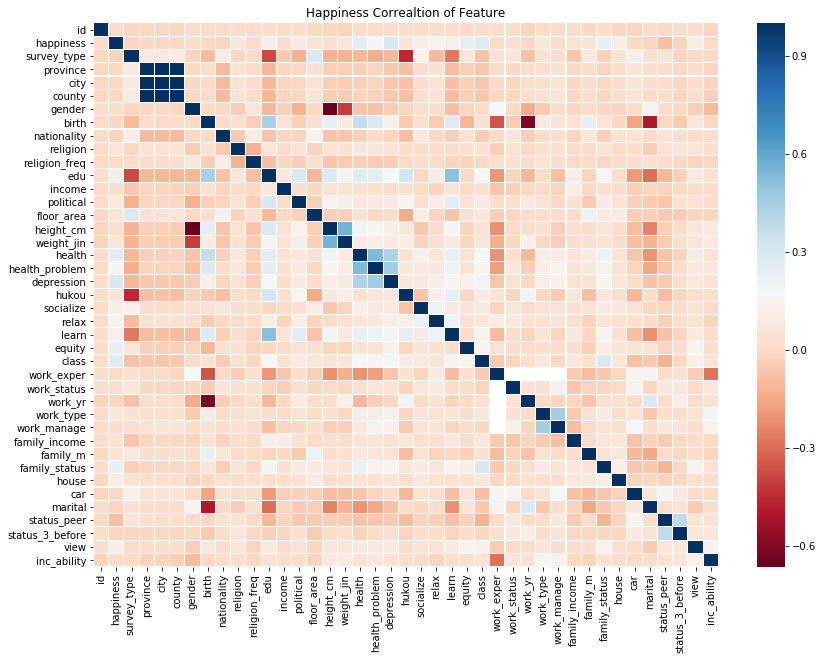

In [6]:
f, ax= plt.subplots(figsize = (14, 10))
sns.heatmap(traindata.corr(),cmap='RdBu', linewidths = 0.05, ax = ax)
# 设置Axes的标题
ax.set_title('Happiness Correaltion of Feature')
f.savefig('corr.png', dpi=100, bbox_inches='tight')


In [4]:
#colormap = plt.cm.viridis
#plt.figure(figsize=(14,12))
#plt.title('Happiness Correaltion of Feature',y=1.05,size=15)
#sns.heatmap(traindata.corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True)

### 3.3特征工程

In [95]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 42 columns):
id                 8000 non-null int64
happiness          8000 non-null int64
survey_type        8000 non-null int64
province           8000 non-null int64
city               8000 non-null int64
county             8000 non-null int64
survey_time        8000 non-null object
gender             8000 non-null int64
birth              8000 non-null category
nationality        8000 non-null int64
religion           8000 non-null int64
religion_freq      8000 non-null int64
edu                8000 non-null int64
income             8000 non-null category
political          8000 non-null int64
floor_area         8000 non-null float64
height_cm          8000 non-null int64
weight_jin         8000 non-null int64
health             8000 non-null int64
health_problem     8000 non-null int64
depression         8000 non-null int64
hukou              8000 non-null int64
socialize          8000 no

In [ ]:
从上面的信息可以得知work_status ; work_type； work_manage ； family_income；存在数据缺失，
其中family_income只有一条数据缺失，我选择去除此数据 ，其他数据都存在5049的缺失work_status ; work_type； work_manage ； 因为相关性最大不超过
0.065,所以也先选择忽略这几个字段进行分析


In [23]:
traindata = traindata.drop(columns=['province', 'city','county','religion_freq','work_exper','work_yr','inc_ability'])

##### 1.happiness

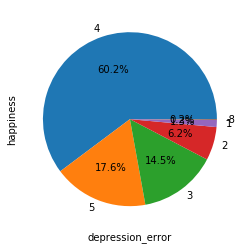

In [29]:
traindata['happiness'].value_counts().plot.pie(autopct= '%1.1f%%')
plt.xlabel('happiness_pie')
plt.show()

可以看出大部分人是4 = 比较幸福,其中有一部分数据是-8,证明是异常数据,这部分数据没有参考意义,去除

In [30]:
traindata = traindata[traindata['happiness'] != -8]

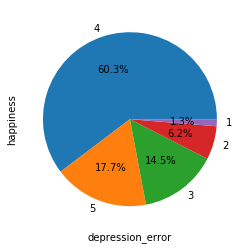

In [33]:
traindata['happiness'].value_counts().plot.pie(autopct= '%1.1f%%')
plt.xlabel('happiness_pie')
plt.show()

从相关性分析做一个排序
depression         0.299933       class              0.267328

health             0.246979     equity             0.245552
        
family_status      0.235988        health_problem     0.182414

relax              0.134761      learn              0.116214

view               0.112572     socialize          0.103588

house              0.103013      edu                0.102945

political          0.094677       status_peer       -0.084743

weight_jin         0.074584       work_type        0.065813

religion             0.063539     hukou               0.057366

family_m           0.054821       family_income  0.047654

floor_area         0.046945        height_cm         0.030380

work_status       0.026440         marital             -0.026026

income              0.024056      tatus_3_before -0.022892

gender               0.022016     work_manage    0.020994

nationality        -0.018928        survey_type      -0.017043

car                    -0.012826

##### 2.depression 
在过去的四周中您感到心情抑郁或沮丧的频繁程度	1 = 总是; 2 = 经常; 3 = 有时; 4 = 很少; 5 = 从不;

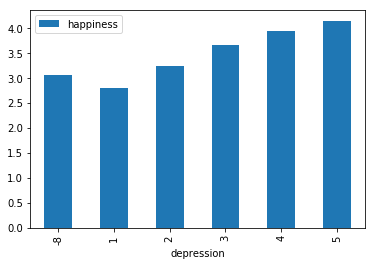

In [31]:
traindata[['depression','happiness']].groupby(['depression']).mean().plot.bar()

In [ ]:
depression与happiness有很大的正相关性,但是对于-8明显的是数据的异常,
对于这部分异常的数据普遍幸福程度不高,而且depression与health和health_problem 有着相关性,我们要考虑这个异常数据的填充
如果这部分异常数据不多我们考虑直接去除异常数据;查看-8的数据所占的比列

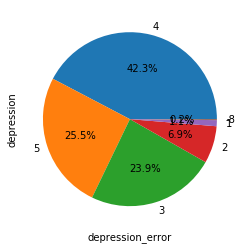

In [34]:
traindata['depression'].value_counts().plot.pie(autopct= '%1.1f%%')
plt.xlabel('depression_error')
plt.show()

In [35]:
traindata = traindata[traindata['depression'] != -8]

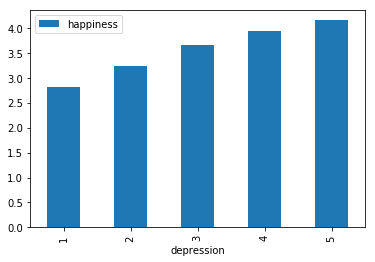

In [36]:
traindata[['depression','happiness']].groupby(['depression']).mean().plot.bar()

##### 3.class
您认为自己目前处于哪个等级上 1 = 1(最底层); 10 = 10(最顶层);

In [38]:
error_class = traindata[traindata['class'] == -8]
error_class.shape[0]

75

In [39]:
traindata.shape[0]

7974

选择去异常数据,也可以是将2或者3替换为-8

In [40]:
traindata = traindata[traindata['class'] != -8]

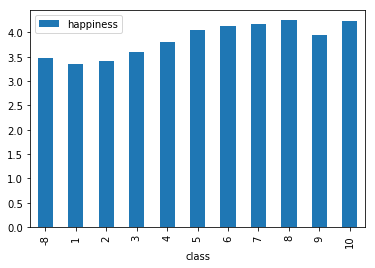

In [139]:
traindata[['class','happiness']].groupby(['class']).mean().plot.bar()

##### 4. health
您觉得您目前的身体健康状况	1 = 很不健康; 2 = 比较不健康; 3 = 一般; 4 = 比较健康; 5 = 很健康;

In [42]:
error_class = traindata[traindata['health'] == -8]
error_class.shape[0]

3

In [43]:
#去除异常数据
traindata = traindata[traindata['health'] != -8]

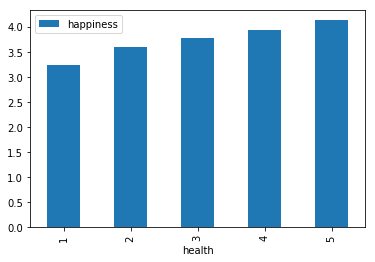

In [44]:
traindata[['health','happiness']].groupby(['health']).mean().plot.bar()

#####  5.equity
总的来说，您认为当今社会公不公平	1 = 完全不公平; 2 = 比较不公平; 3 = 说不上公平但也不能说不公平; 4 = 比较公平; 5 = 完全公平; 

In [45]:
error_class = traindata[traindata['equity'] == -8]
error_class.shape[0]

34

In [46]:
#去除异常数据--异常数据不处理
#traindata = traindata[traindata['equity'] != -8]

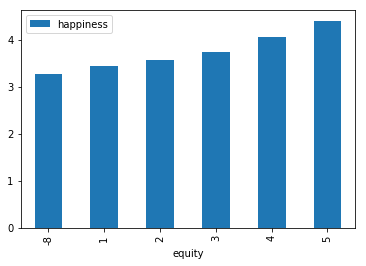

In [138]:
#equity	a35	
traindata[['equity','happiness']].groupby(['equity']).mean().plot.bar()


#####  6.family_status
您家的家庭经济状况在所在地属于哪一档	1 = 远低于平均水平; 2 = 低于平均水平; 3 = 平均水平; 4 = 高于平均水平; 5 = 远高于平均水平; 


In [48]:
error_class = traindata[traindata['family_status'] == -8]
error_class.shape[0]

36

In [49]:
#去除异常数据
traindata = traindata[traindata['family_status'] != -8]

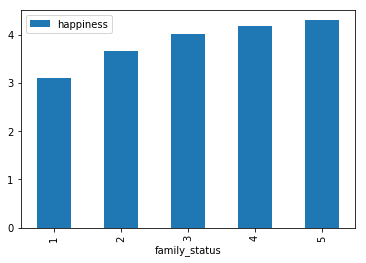

In [50]:
traindata[['family_status','happiness']].groupby(['family_status']).mean().plot.bar()

##### 7.health_problem	
在过去的四周中由于健康问题影响到您的工作或其他日常活动的频繁程度	-

In [51]:
error_class = traindata[traindata['health_problem'] == -8]
error_class.shape[0]

33

In [52]:
#去除异常数据
traindata = traindata[traindata['health_problem'] != -8]

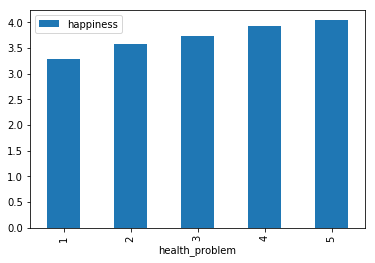

In [53]:
traindata[['health_problem','happiness']].groupby(['health_problem']).mean().plot.bar()

##### 8.relax 
在过去一年中，您是否经常在您的空闲时间做下面的事情-休息放松	1 = 从不; 2 = 很少; 3 = 有时; 4 = 经常; 5 = 非常频繁; 


In [54]:
error_class = traindata[traindata['relax'] == -8]
error_class.shape[0]

12

In [55]:
#去除异常数据
traindata = traindata[traindata['relax'] != -8]

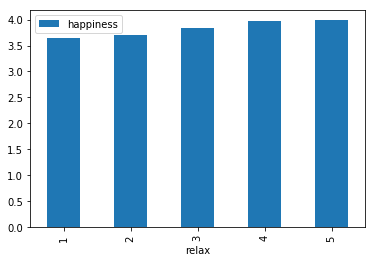

In [56]:
traindata[['relax','happiness']].groupby(['relax']).mean().plot.bar()

##### 9.learn		
在过去一年中，您是否经常在您的空闲时间做下面的事情-学习充电	1 = 从不; 2 = 很少; 3 = 有时; 4 = 经常; 5 = 非常频繁; 


In [58]:
error_class = traindata[traindata['learn'] == -8]
error_class.shape[0]

10

In [59]:
#去除异常数据
traindata = traindata[traindata['learn'] != -8]

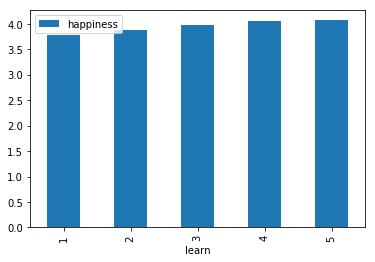

In [60]:
traindata[['learn','happiness']].groupby(['learn']).mean().plot.bar()

##### 10.view 
根据您的一般印象您对一些重要事情所持的观点和看法与社会大众一致的时候有多少	1 = 一致的时候非常少; 2 = 一致的时候比较少; 3 = 一般; 4 = 一致的时候比较多; 5 = 一致的时候非常多; 


In [62]:
error_class = traindata[traindata['view'] == -8]
error_class.shape[0]

168

In [65]:
#view的异常数据比较多,暂时选择不删除异常view,而异常数据的均值更接近3,所以对于-8的数据我们设置为3
traindata['view'].replace(-8,3,inplace = True)

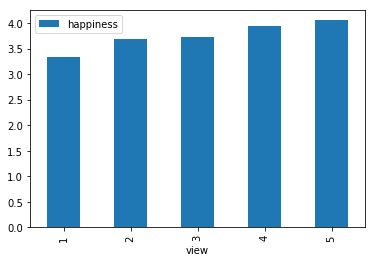

In [68]:
traindata[['view','happiness']].groupby(['view']).mean().plot.bar()

##### 11.socialize
在过去一年中，您是否经常在您的空闲时间做下面的事情-社交	1 = 从不; 2 = 很少; 3 = 有时; 4 = 经常; 5 = 非常频繁; 


In [69]:
error_class = traindata[traindata['socialize'] == -8]
error_class.shape[0]

1

In [70]:
#去除异常数据
traindata = traindata[traindata['socialize'] != -8]

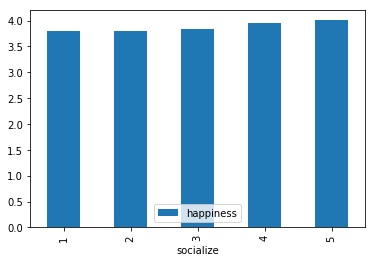

In [71]:
traindata[['socialize','happiness']].groupby(['socialize']).mean().plot.bar()

##### 12.house 
您家现拥有几处房产	96 = 房产数超过两位数; 


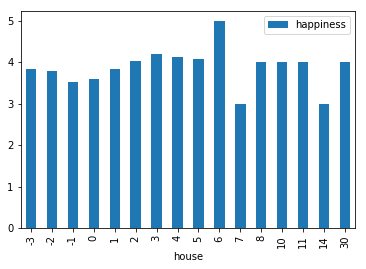

In [72]:
traindata[['house','happiness']].groupby(['house']).mean().plot.bar()

##### 13.edu 
您目前的最高教育程度（包括目前在读的） 	1 = 没有受过任何教育; 2 = 私塾、扫盲班; 3 = 小学; 4 = 初中; 5 = 职业高中; 6 = 普通高中; 7 = 中专; 8 = 技校; 9 = 大学专科（成人高等教育）; 10 = 大学专科（正规高等教育）; 11 = 大学本科（成人高等教育）; 12 = 大学本科（正规高等教育）; 13 = 研究生及以上; 14 = 其他; 


In [74]:
error_class = traindata[traindata['edu'] == -8]
error_class.shape[0]

7

In [75]:
#去除异常数据
traindata = traindata[traindata['edu'] != -8]

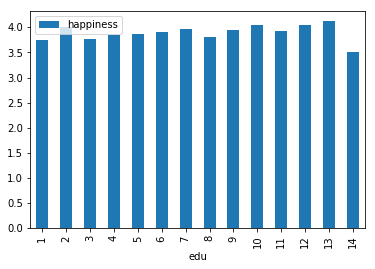

In [76]:
traindata[['edu','happiness']].groupby(['edu']).mean().plot.bar()

从上面edu和house已经找不到跟happniess很规律的影响了所以放弃这两个及以后的元素的相关分析,开始分析一些特殊元素

### 以下对一些特殊的字段进行处理

#####  14.birth
您的出生日期-年

In [89]:
print(traindata['birth'].describe())

count    8000.000000
mean     1964.707625
std        16.842865
min      1921.000000
25%      1952.000000
50%      1965.000000
75%      1977.000000
max      1997.000000
Name: birth, dtype: float64


In [99]:
#再分细一点
#将数据分为几个年龄段60-100 岁，50-60.40-50.30-40,18-30
bins = [1915, 1955,1965,1975,1985, 1997] 
traindata['birth'] = pd.cut(traindata['birth'],bins)
by_age = traindata.groupby('birth')['happiness'].mean()
print(by_age)

birth
(1915, 1955]    3.911787
(1955, 1965]    3.740765
(1965, 1975]    3.782955
(1975, 1985]    3.858439
(1985, 1997]    3.946809
Name: happiness, dtype: float64


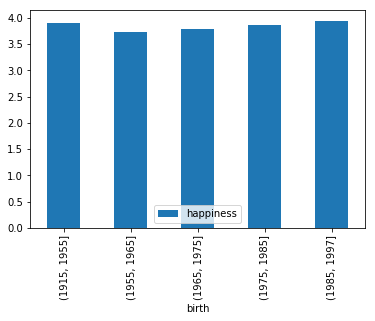

In [100]:
#birth		您的出生日期-年	-
traindata[['birth','happiness']].groupby(['birth']).mean().plot.bar()

In [ ]:
根据分析，中年人的35-60岁之间的人幸福指数最低,但是影响不是很明显

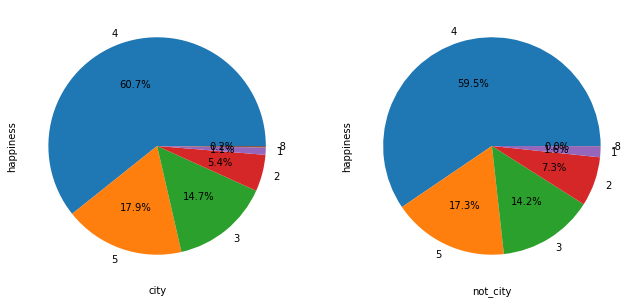

In [40]:
#traindata.groupby(['survey_type','happiness'])['happiness'].count()
#将数据分为有 1 = 城市; 2 = 农村的所占比列两组：1 = 非常不幸福; 2 = 比较不幸福; 3 = 说不上幸福不幸福; 4 = 比较幸福; 5 = 非常幸福
city_df = traindata[traindata['survey_type'] == 1]
not_city_df = traindata[traindata['survey_type'] == 2]

plt.figure(figsize=(11,5))
plt.subplot(121)
city_df['happiness'].value_counts().plot.pie(autopct= '%1.1f%%')
plt.xlabel('city')
 
plt.subplot(122)
not_city_df['happiness'].value_counts().plot.pie(autopct= '%1.1f%%')
plt.xlabel('not_city')
 
plt.show()

从上面的两个图标来看survey_type的平均幸福指数，和各类幸福程度的占比都相差不大，认为survey_type对幸福指数没有影响

In [92]:
#income		您个人去年全年的总收入	9999996 = 个人全年总收入高于百万位数; 
print(traindata['income'].describe())

count    8.000000e+03
mean     3.330734e+04
std      2.329853e+05
min     -3.000000e+00
25%      1.695000e+03
50%      1.500000e+04
75%      3.600000e+04
max      9.999990e+06
Name: income, dtype: float64


In [93]:
#对于年收入分等级 无收入，十万以内，三十万以内，五十万以内，百万以内，千万级别
bins = [-100,0,100000,300000,500000,1000000,10000000] 
traindata['income'] = pd.cut(traindata['income'],bins)
by_income = traindata.groupby('income')['happiness'].mean()
print(by_income)

income
(-100, 0]              3.770732
(0, 100000]            3.863185
(100000, 300000]       4.048193
(300000, 500000]       4.157895
(500000, 1000000]      4.227273
(1000000, 10000000]    4.333333
Name: happiness, dtype: float64


大概分析收入越高幸福指数越高

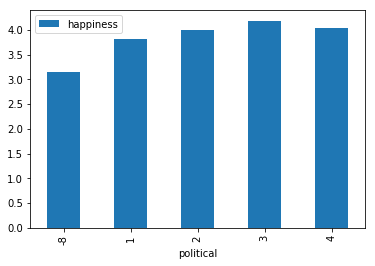

In [65]:
#political	您目前的政治面貌	1 = 群众; 2 = 共青团员; 3 = 民主党派; 4 = 共产党员;
traindata[['political','happiness']].groupby(['political']).mean().plot.bar()

In [66]:
#floor_area		您现在住的这座住房的套内建筑面积	-
print(traindata['floor_area'].describe())

count    8000.000000
mean      115.302954
std        87.275890
min         3.000000
25%        64.000000
50%        96.000000
75%       130.000000
max      1300.000000
Name: floor_area, dtype: float64


In [67]:
bins = [0,30,60,100,130,1500] 
traindata['floor_area'] = pd.cut(traindata['floor_area'],bins)
by_floor_area = traindata.groupby('floor_area')['happiness'].mean()
print(by_floor_area)

floor_area
(0, 30]        3.694915
(30, 60]       3.728947
(60, 100]      3.863636
(100, 130]     3.930636
(130, 1500]    3.906788
Name: happiness, dtype: float64


In [ ]:
居住面积影响不是特别大但也有线性相关的趋势

In [103]:
#height_cm		您目前的身高是（厘米）	-
#weight_jin		您目前的体重是（斤）	-
whbmi=(traindata['weight_jin']/2)/((traindata['height_cm']/100)*(traindata['height_cm']/100))
traindata['whbmi'] = whbmi

In [104]:
print(traindata['whbmi'].describe())

count    8000.000000
mean       22.532004
std         3.564708
min         7.807852
25%        20.202020
50%        22.313278
75%        24.654832
max        49.149338
Name: whbmi, dtype: float64


In [105]:
#过轻：低于18.5 正常：18.5-23.9 过重：24-27 肥胖：28-32 非常肥胖, 高于32
bins = [0,18.5,24,28,32,50] 
traindata['whbmi'] = pd.cut(traindata['whbmi'],bins)
by_whbmi = traindata.groupby('whbmi')['happiness'].mean()
print(by_whbmi)

whbmi
(0.0, 18.5]     3.713134
(18.5, 24.0]    3.828922
(24.0, 28.0]    3.944557
(28.0, 32.0]    3.933036
(32.0, 50.0]    3.774648
Name: happiness, dtype: float64


过轻和肥胖的相对幸福指数要低,一般过轻和肥胖也是健康状态不是那么好

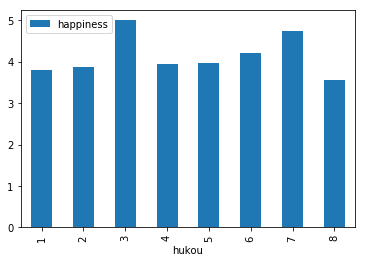

In [74]:
#hukou	a18	您目前的户口登记状况	1 = 农业户口; 2 = 非农业户口; 3 = 蓝印户口; 4 = 居民户口（以前是农业户口）; 5 = 居民户口（以前是非农业户口）; 6 = 军籍; 7 = 没有户口; 8 = 其他;
traindata[['hukou','happiness']].groupby(['hukou']).mean().plot.bar()

In [107]:
hukou_3 = traindata[traindata['hukou'] == 3]
error_class.shape[0]

7

In [108]:
hukou_3 = traindata[traindata['hukou'] == 7]
error_class.shape[0]

7

In [ ]:
蓝印户口,军籍,没有户口的相对幸福指数要高一些,但是由于样本比列太少了不作为参考

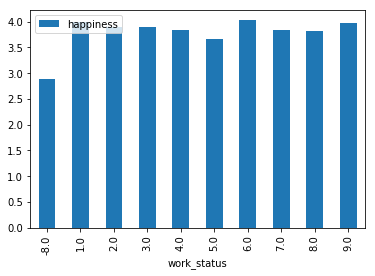

In [81]:
#work_status	a59a	下列各种情形，哪一种更符合您目前工作的状况	1 = 自己是老板（或者是合伙人）; 2 = 个体工商户; 3 = 受雇于他人（有固定雇主）; 4 = 劳务工/劳务派遣人员; 5 = 零工、散工（无固定雇主的受雇者）; 6 = 在自己家的生意/企业中工作/帮忙，领工资; 7 = 在自己家的生意/企业中工作/帮忙，不领工资; 8 = 自由职业者; 9 = 其他; 
traindata[['work_status','happiness']].groupby(['work_status']).mean().plot.bar()

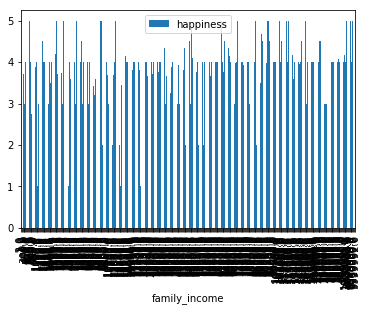

In [99]:
#family_income	a62	您家去年全年家庭总收入	9999996 = 全年全家总收入超过了百万位数; 
traindata[['family_income','happiness']].groupby(['family_income']).mean().plot.bar()

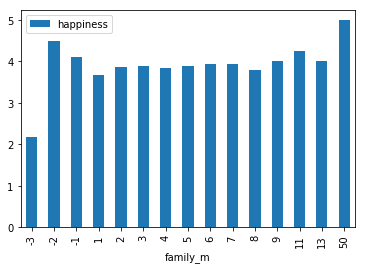

In [90]:
#family_m	a63	您家目前住在一起的通常有几人（包括您本人）
traindata[['family_m','happiness']].groupby(['family_m']).mean().plot.bar()

家庭总收入和人数都没有呈现一定的规律，所以使用这两个再做一次数据处理

In [91]:
print(traindata['family_income'].describe())

count    7.999000e+03
mean     6.776050e+04
std      2.909591e+05
min     -3.000000e+00
25%      1.300000e+04
50%      3.800000e+04
75%      7.000000e+04
max      9.999992e+06
Name: family_income, dtype: float64


In [109]:
avg_income=traindata['family_income']/traindata['family_m']
traindata['avg_income'] = avg_income

In [93]:
print(traindata['avg_income'].describe())

count    7.999000e+03
mean     2.951270e+04
std      1.961064e+05
min     -3.000000e+05
25%      5.000000e+03
50%      1.333333e+04
75%      3.000000e+04
max      9.150000e+06
Name: avg_income, dtype: float64


In [110]:
#对于年收入分等级 无收入，2万以内，5万以内，十万以内，百万以内，千万级别
bins = [-100,0,20000,50000,100000,1000000,10000000] 
traindata['avg_income'] = pd.cut(traindata['avg_income'],bins)

家庭人数为-1 -2 -3 和50的数据应该是异常数据，人均年收入对幸福指数呈现线性变化

In [114]:
error_class = traindata[traindata['family_m'] == 50]
error_class.shape[0]

1

In [115]:
traindata = traindata[traindata['socialize'] != -1]
traindata = traindata[traindata['socialize'] != -2]
traindata = traindata[traindata['socialize'] != -3]
traindata = traindata[traindata['socialize'] != 50]

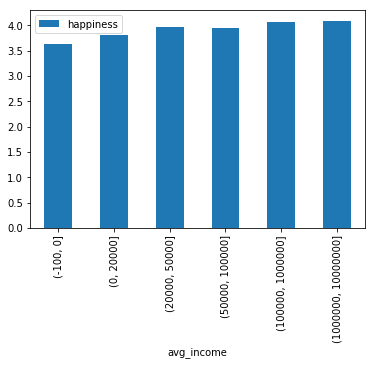

In [116]:
#人均年收入与幸福指数的关系
traindata[['avg_income','happiness']].groupby(['avg_income']).mean().plot.bar()

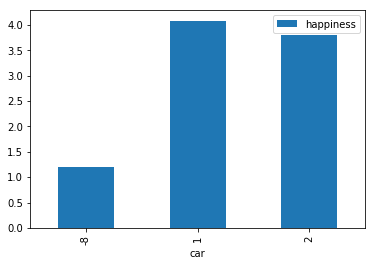

In [87]:
#car	a66	您家是否拥有家用小汽车	1 = 有; 2 = 没有; 
traindata[['car','happiness']].groupby(['car']).mean().plot.bar()

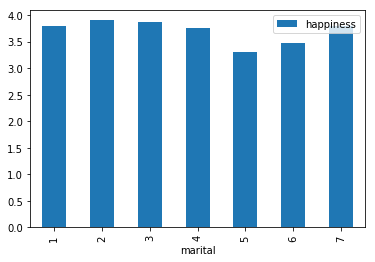

In [117]:
#marital a69 您目前的婚姻状况 1 = 未婚; 2 = 同居; 3 = 初婚有配偶; 4 = 再婚有配偶; 5 = 分居未离婚; 6 = 离婚; 7 = 丧偶;
traindata[['marital','happiness']].groupby(['marital']).mean().plot.bar()

5 = 分居未离婚; 6 = 离婚 这两种婚姻状况幸福程度相对低一点,其他的没有特别明显的差异
所以我选择将数据做一次变量调整,将1,2,3,4,7 设置为1,6设置为2,5设置为3

In [136]:
traindata['marital'].replace(2,1,inplace = True)
traindata['marital'].replace(3,1,inplace = True)
traindata['marital'].replace(4,1,inplace = True)
traindata['marital'].replace(7,1,inplace = True)
traindata['marital'].replace(6,2,inplace = True)
traindata['marital'].replace(5,3,inplace = True)

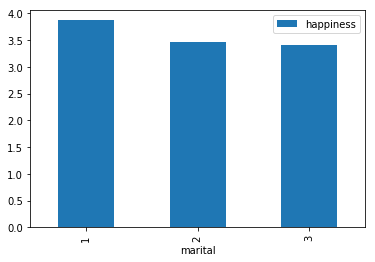

In [137]:
traindata[['marital','happiness']].groupby(['marital']).mean().plot.bar()

In [118]:
error_class = traindata[traindata['status_peer'] == -8]
error_class.shape[0]

49

In [121]:
traindata = traindata[traindata['status_peer'] != -8]

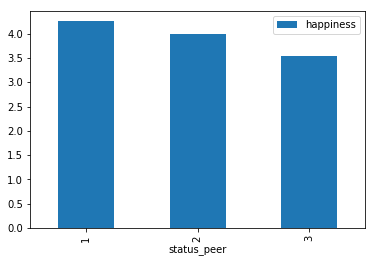

In [122]:
#status_peer	b1	与同龄人相比，您本人的社会经济地位怎样	1 = 较高; 2 = 差不多; 3 = 较低; 
traindata[['status_peer','happiness']].groupby(['status_peer']).mean().plot.bar()

status_peer 和幸福还是有一点线性的关系的

In [128]:
error_class = traindata[traindata['status_3_before'] == -8]
error_class.shape[0]

0

In [129]:
traindata = traindata[traindata['status_3_before'] != -8]

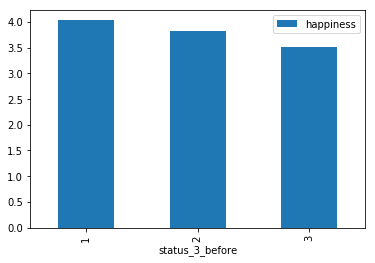

In [130]:
#status_3_before	b2	与三年前相比，您的社会经济地位发生了什么变化	1 = 上升了; 2 = 差不多; 3 = 下降了; 
traindata[['status_3_before','happiness']].groupby(['status_3_before']).mean().plot.bar()

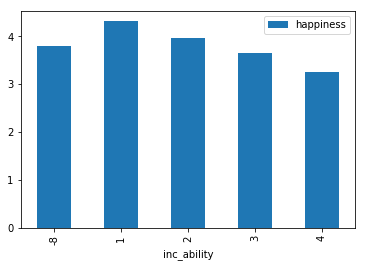

In [132]:
#inc_ability		考虑到您的能力和工作状况，您目前的收入是否合理	1 = 非常合理; 2 = 合理; 3 = 不合理; 4 = 非常不合理; 
traindata[['inc_ability','happiness']].groupby(['inc_ability']).mean().plot.bar()

In [133]:
error_class = traindata[traindata['inc_ability'] == -8]
error_class.shape[0]

937

由于-8的值比较多我们不能移除,我们选择将他们设置为3,因为指数和三最想接近

In [134]:
traindata['inc_ability'].replace(-8,3,inplace = True)

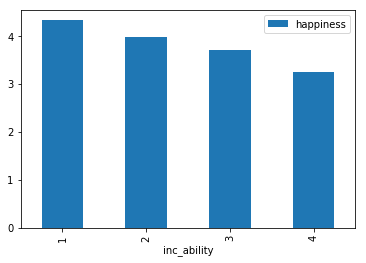

In [135]:
traindata[['inc_ability','happiness']].groupby(['inc_ability']).mean().plot.bar()

这样和幸福指数就有了线性关系

### 4.特征分析与数据处理

经过以上的分析我决定将以下参数纳入算法的计算中,并对这些特征值做以下处理

happiness：有一部分数据是-8,证明是异常数据,这部分数据没有参考意义,去除
traindata = traindata[traindata['happiness'] != -8]

depression：在过去的四周中您感到心情抑郁或沮丧的频繁程度 1 = 总是; 2 = 经常; 3 = 有时; 4 = 很少; 5 = 从不;并且去除-8明显的是数据的异常,
traindata = traindata[traindata['depression'] != -8]

class：您认为自己目前处于哪个等级上 1 = 1(最底层); 10 = 10(最顶层);并且去除-8明显的是数据的异常
traindata = traindata[traindata['class'] != -8]

health：您觉得您目前的身体健康状况 1 = 很不健康; 2 = 比较不健康; 3 = 一般; 4 = 比较健康; 5 = 很健康;并且去除-8明显的是数据的异常
traindata = traindata[traindata['health'] != -8]

equity：总的来说，您认为当今社会公不公平 1 = 完全不公平; 2 = 比较不公平; 3 = 说不上公平但也不能说不公平; 4 = 比较公平; 5 = 完全公平;并且去除-8明显的是数据的异常
traindata = traindata[traindata['equity'] != -8]

family_status：您家的家庭经济状况在所在地属于哪一档 1 = 远低于平均水平; 2 = 低于平均水平; 3 = 平均水平; 4 = 高于平均水平; 5 = 远高于平均水平;
traindata = traindata[traindata['family_status'] != -8]

health_problem：在过去的四周中由于健康问题影响到您的工作或其他日常活动的频繁程度 -1-5
traindata = traindata[traindata['health_problem'] != -8]

relax：在过去一年中，您是否经常在您的空闲时间做下面的事情-休息放松 1 = 从不; 2 = 很少; 3 = 有时; 4 = 经常; 5 = 非常频繁;
traindata = traindata[traindata['relax'] != -8]

learn：在过去一年中，您是否经常在您的空闲时间做下面的事情-学习充电 1 = 从不; 2 = 很少; 3 = 有时; 4 = 经常; 5 = 非常频繁;
traindata = traindata[traindata['learn'] != -8]

view：根据您的一般印象您对一些重要事情所持的观点和看法与社会大众一致的时候有多少 1 = 一致的时候非常少; 2 = 一致的时候比较少; 3 = 一般; 4 = 一致的时候比较多; 5 = 一致的时候非常多;
#view的异常数据比较多,暂时选择不删除异常view,而异常数据的均值更接近3,所以对于-8的数据我们设置为3
traindata['view'].replace(-8,3,inplace = True)

socialize：在过去一年中，您是否经常在您的空闲时间做下面的事情-社交 1 = 从不; 2 = 很少; 3 = 有时; 4 = 经常; 5 = 非常频繁;
traindata = traindata[traindata['socialize'] != -8]

income：您个人去年全年的总收入	9999996 = 个人全年总收入高于百万位数;
将年收入分类
#对于年收入分等级 无收入，十万以内，三十万以内，五十万以内，百万以内，千万级别
bins = [-100,0,100000,300000,500000,1000000,10000000] 
大概分析收入越高幸福指数越高


身高体重的比例
whbmi=(traindata['weight_jin']/2)/((traindata['height_cm']/100)*(traindata['height_cm']/100))
traindata['whbmi'] = whbmi
#过轻：低于18.5 正常：18.5-23.9 过重：24-27 肥胖：28-32 非常肥胖, 高于32
bins = [0,18.5,24,28,32,100] 
traindata['whbmi'] = pd.cut(traindata['whbmi'],bins)
结果显示过轻和肥胖的相对幸福指数要低,一般过轻和肥胖也是健康状态不是那么好所以先不做分析

hukou	您目前的户口登记状况	1 = 农业户口; 2 = 非农业户口; 3 = 蓝印户口; 4 = 居民户口（以前是农业户口）; 5 = 居民户口（以前是非农业户口）; 6 = 军籍; 7 = 没有户口; 8 = 其他;
蓝印户口,军籍,没有户口的相对幸福指数要高一些,但是由于样本比列太少了，各只有七个不作为参考

家庭年收入和人数看上去对幸福没什么影响但是人均收入就有一定的规律
avg_income=traindata['family_income']/traindata['family_m']
traindata['avg_income'] = avg_income
bins = [-100,0,20000,50000,100000,1000000,10000000] 
traindata['avg_income'] = pd.cut(traindata['avg_income'],bins)
家庭人数为-1 -2 -3 和50的数据应该是异常数据，人均年收入对幸福指数呈现线性变化
traindata = traindata[traindata['socialize'] != -1]
traindata = traindata[traindata['socialize'] != -2]
traindata = traindata[traindata['socialize'] != -3]
traindata = traindata[traindata['socialize'] != 50]

marital a69 您目前的婚姻状况 1 = 未婚; 2 = 同居; 3 = 初婚有配偶; 4 = 再婚有配偶; 5 = 分居未离婚; 6 = 离婚; 7 = 丧偶;
5 = 分居未离婚; 6 = 离婚 这两种婚姻状况幸福程度相对低一点,其他的没有特别明显的差异
所以我选择将数据做一次变量调整,将1,2,3,4,7 设置为1,6设置为2,5设置为3
traindata['marital'].replace(2,1,inplace = True)
traindata['marital'].replace(3,1,inplace = True)
traindata['marital'].replace(4,1,inplace = True)
traindata['marital'].replace(7,1,inplace = True)
traindata['marital'].replace(6,2,inplace = True)
traindata['marital'].replace(5,3,inplace = True)

status_peer	与同龄人相比，您本人的社会经济地位怎样	1 = 较高; 2 = 差不多; 3 = 较低; 
出去-8的异类数据status_peer 和幸福还是有一点线性的关系的
traindata = traindata[traindata['status_peer'] != -8]

status_3_before与三年前相比，您的社会经济地位发生了什么变化	1 = 上升了; 2 = 差不多; 3 = 下降了; 
-8的异类数据status_peer 和幸福还是有一点线性的关系的
traindata = traindata[traindata['status_3_before'] != -8]

inc_ability	 考虑到您的能力和工作状况，您目前的收入是否合理	1 = 非常合理; 2 = 合理; 3 = 不合理; 4 = 非常不合理; 
由于-8的值比较多我们不能移除,我们选择将他们设置为3,因为指数和三最想接近
traindata['inc_ability'].replace(-8,3,inplace = True)
这样和幸福指数就有了线性关系


In [8]:
# 读取数据
#testdata = pd.read_csv('data/happiness_test_abbr.csv')
#traindata = pd.read_csv('data/happiness_train_abbr.csv')
# 读取数据
#testdata = pd.read_csv('../data/dataannalysis/happiness_test_abbr.csv')
traindata = pd.read_csv('../data/dataannalysis/happiness_train_abbr.csv')
#异常数据处理
traindata = traindata[traindata['happiness'] != -8]
traindata = traindata[traindata['depression'] != -8]
traindata = traindata[traindata['class'] != -8]
traindata = traindata[traindata['health'] != -8]
traindata = traindata[traindata['equity'] != -8]
traindata = traindata[traindata['family_status'] != -8]
traindata = traindata[traindata['health_problem'] != -8]
traindata = traindata[traindata['relax'] != -8]
traindata = traindata[traindata['learn'] != -8]
traindata['view'].replace(-8,3,inplace = True)
traindata = traindata[traindata['socialize'] != -8]
traindata = traindata[traindata['socialize'] != -1]
traindata = traindata[traindata['socialize'] != -2]
traindata = traindata[traindata['socialize'] != -3]
traindata = traindata[traindata['socialize'] != 50]
traindata = traindata[traindata['status_3_before'] != -8]
traindata = traindata[traindata['status_peer'] != -8]
traindata['inc_ability'].replace(-8,3,inplace = True)

#数据重新处理
traindata['marital'].replace(2,1,inplace = True)
traindata['marital'].replace(3,1,inplace = True)
traindata['marital'].replace(4,1,inplace = True)
traindata['marital'].replace(7,1,inplace = True)
traindata['marital'].replace(6,2,inplace = True)
traindata['marital'].replace(5,3,inplace = True)

bins = [-100,0,100000,300000,500000,1000000,10000000] 
traindata['income'] = pd.cut(traindata['income'],bins, labels=['1','2', '3', '4', '5', '6'])



avg_income=traindata['family_income']/traindata['family_m']
traindata['avg_income'] = avg_income
bins = [-100,0,20000,50000,100000,1000000,10000000] 
traindata['avg_income'] = pd.cut(traindata['avg_income'],bins, labels=['1','2', '3', '4', '5', '6'])





In [9]:
#traindata['avg_income'].('unknown', inplace=True)
traindata['avg_income'] = traindata['avg_income'].cat.add_categories(['0']);
traindata['avg_income'].fillna('0', inplace=True)

In [11]:
le = sklearn.preprocessing.LabelEncoder() 
le.fit(['1','2', '3', '4', '5', '6', '0']) 
traindata['avg_income']  = le.transform(traindata['avg_income'] ) 

AttributeError: module 'sklearn' has no attribute 'preprocessing'

In [12]:
le = sklearn.preprocessing.LabelEncoder() 
le.fit(['1','2', '3', '4', '5', '6']) 
traindata['income']  = le.transform(traindata['income'] ) 

AttributeError: module 'sklearn' has no attribute 'preprocessing'

In [204]:
#重新做相关性分析
traindata.corr()['happiness']

id                 0.008267
happiness          1.000000
survey_type       -0.035656
province          -0.021285
city              -0.023442
county            -0.021499
gender             0.018517
birth             -0.004821
nationality       -0.035595
religion           0.006780
religion_freq      0.010455
edu                0.104231
income             0.043733
political          0.080010
floor_area         0.044722
height_cm          0.040638
weight_jin         0.084260
health             0.246918
health_problem     0.212923
depression         0.320490
hukou              0.079546
socialize          0.079689
relax              0.123843
learn              0.123454
equity             0.284537
class              0.301481
work_exper         0.008198
work_status       -0.039226
work_yr           -0.018063
work_type          0.021679
work_manage       -0.039622
family_income      0.052113
family_m           0.059978
family_status      0.306640
house              0.092656
car               -0

根据上面的一些分析happiness想要加入计算的熟悉有:depression;class;health;equity;family_status;health_problem;relax;learn;view;socialize;
status_peer;status_3_before;inc_ability;car;avg_income  --	  marital;按推测应该是有关系的最后却相关性很小需要重新计算edu

#### 丢弃不加入算法的数据 

In [13]:
traindatafinal = traindata[['happiness','depression','depression','class','health','equity','family_status','health_problem','relax','learn','view','socialize','status_peer','status_3_before','inc_ability','car','avg_income','edu']]

In [14]:
traindatafinal.head()


,happiness,depression,depression,class,health,equity,family_status,health_problem,relax,learn,view,socialize,status_peer,status_3_before,inc_ability,car,avg_income,edu
0,4,5,5,3,3,3,2,2,4,3,4,2,3,2,3,2,3,11
1,4,3,3,6,5,3,4,4,4,3,4,2,1,1,2,2,2,12
2,4,5,5,5,4,4,3,4,4,2,4,3,2,1,2,2,2,4
3,5,4,4,5,4,4,3,4,4,4,3,2,2,1,2,1,2,3
4,4,3,3,1,5,2,3,5,3,4,3,4,3,2,3,1,1,12


#### 处理需要预测数据

In [49]:
# 读取数据
testdata = pd.read_csv('../data/dataannalysis/happiness_test_abbr.csv')
#异常数据处理

testdata['view'].replace(-8,3,inplace = True)

testdata['inc_ability'].replace(-8,3,inplace = True)

#数据重新处理
testdata['marital'].replace(2,1,inplace = True)
testdata['marital'].replace(3,1,inplace = True)
testdata['marital'].replace(4,1,inplace = True)
testdata['marital'].replace(7,1,inplace = True)
testdata['marital'].replace(6,2,inplace = True)
testdata['marital'].replace(5,3,inplace = True)

bins = [-100,0,100000,300000,500000,1000000,10000000] 
testdata['income'] = pd.cut(testdata['income'],bins, labels=['1','2', '3', '4', '5', '6'])



avg_income=testdata['family_income']/traindata['family_m']
testdata['avg_income'] = avg_income
bins = [-100,0,20000,50000,100000,1000000,10000000] 
testdata['avg_income'] = pd.cut(testdata['avg_income'],bins, labels=['1','2', '3', '4', '5', '6'])

In [50]:
#traindata['avg_income'].('unknown', inplace=True)
testdata['avg_income'] = testdata['avg_income'].cat.add_categories(['0']);
testdata['avg_income'].fillna('0', inplace=True)

In [51]:
testdatafinal = testdata[['depression','depression','class','health','equity','family_status','health_problem','relax','learn','view','socialize','status_peer','status_3_before','inc_ability','car','avg_income','edu']]

In [52]:
testdatafinal.shape[0]

2968


#### 拆分数据

In [15]:
traindatafinal.shape[0]

7718

In [16]:
train_data = traindatafinal[:7000]
test_data = traindatafinal[7000:]
 
train_data_X = train_data.drop(['happiness'],axis=1)
train_data_Y = train_data['happiness']
test_data_X = test_data.drop(['happiness'],axis=1)
test_data_Y = test_data['happiness']

##  5.机器学习建模

综合分析后我先用随机森林做一个预测

In [36]:

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [37]:
rfc = RandomForestClassifier()
 
rfc.fit(train_data_X, train_data_Y)
 
y_predict = rfc.predict(test_data_X)
 
print(rfc.score(test_data_X, test_data_Y))


0.5738161559888579


C:\Users\Coffee\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [38]:

print(classification_report(test_data_Y, y_predict))

              precision    recall  f1-score   support

           1       0.33      0.11      0.17         9
           2       0.30      0.16      0.21        45
           3       0.19      0.13      0.16       104
           4       0.65      0.84      0.74       430
           5       0.43      0.21      0.28       130

   micro avg       0.57      0.57      0.57       718
   macro avg       0.38      0.29      0.31       718
weighted avg       0.52      0.57      0.53       718



In [57]:
print(train_data_X.shape[1])
print(testdatafinal.shape[1])

17
17


In [60]:
 
y_test_predict = rfc.predict(testdatafinal)

In [61]:
 testdata.insert(0,'happiness',y_test_predict)

In [62]:
testdata.head()

,happiness,id,survey_type,province,city,county,survey_time,gender,birth,nationality,...,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,avg_income
0,4,8001,1,2,2,9,2015/7/24 10:30,2,1972,8,...,5,3,1,2,1,3,1,4,2,1
1,4,8002,1,22,66,106,2015/7/12 15:38,2,1938,1,...,1,1,2,2,1,3,3,4,2,2
2,3,8003,2,9,22,44,2015/7/5 9:36,2,1935,1,...,1,2,1,2,1,3,1,3,4,1
3,4,8004,2,18,52,86,2015/7/19 10:10,2,1992,1,...,2,4,1,2,1,2,1,3,2,3
4,4,8005,2,24,70,110,2015/8/3 11:41,1,1990,1,...,3,2,1,2,1,2,2,5,2,2


In [64]:
col=['id','happiness']
testdata.to_csv('../data/dataannalysis/happiness_result.csv',index=False,columns=col)
